# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [78]:
# Carregamento dos pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [79]:
# Carregamento da base 'previsao_de_renda.csv'
df = pd.read_csv('previsao_de_renda.csv')

In [80]:
# Visualização das variáveis na base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

Há variáveis que não serão utilizadas na análise (Unamed: 0, data_ref e id_cliente). Além disso, vemos a quantidade de linhas da variável 'tempo_emprego' é menor do que todas as outras variáveis. Então, também vamos remover as linhas em que há valores nulos.

In [81]:
# Filtração da base
previsao = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)
previsao = previsao.dropna(axis=0)

In [82]:
# Tipos de variáveis na base
previsao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12427 non-null  object 
 1   posse_de_veiculo       12427 non-null  bool   
 2   posse_de_imovel        12427 non-null  bool   
 3   qtd_filhos             12427 non-null  int64  
 4   tipo_renda             12427 non-null  object 
 5   educacao               12427 non-null  object 
 6   estado_civil           12427 non-null  object 
 7   tipo_residencia        12427 non-null  object 
 8   idade                  12427 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  12427 non-null  float64
 11  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.1+ MB


In [83]:
# Visualização da tabela
previsao.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
14994,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27
14999,F,False,True,2,Servidor público,Secundário,União,Casa,34,7.219178,4.0,1160.99


Os índices da tabela continuam sendo os mesmos como se algumas linhas não tivessem removidas. Vamos corrigir isso.

In [84]:
# Correção dos índices da tabela com a remoção de algumas linhas
novo_indice = pd.Series([i for i in range(len(previsao['renda']))])
previsao.set_index(novo_indice)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
12422,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57
12423,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
12424,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
12425,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.  


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for maior que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

Realização dos items:
1. Ajuste para prever log(renda) com todas as covariáveis disponíveis

In [85]:
# Criando as matrizes de análise, com as variáveis qualitativas como dummies
y, X = patsy.dmatrices('''np.log(renda) ~ C(sexo) +  C(posse_de_veiculo) +
                       C(posse_de_imovel) + C(tipo_renda) + 
                       C(educacao) + C(estado_civil) + C(tipo_residencia) +
                       qtd_filhos + idade + tempo_emprego + 
                       qt_pessoas_residencia''', data = previsao)

In [86]:
# Visualização da matriz com as variáveis explicativas
X

DesignMatrix with shape (12427, 25)
  Columns:
    ['Intercept',
     'C(sexo)[T.M]',
     'C(posse_de_veiculo)[T.True]',
     'C(posse_de_imovel)[T.True]',
     'C(tipo_renda)[T.Bolsista]',
     'C(tipo_renda)[T.Empresário]',
     'C(tipo_renda)[T.Pensionista]',
     'C(tipo_renda)[T.Servidor público]',
     'C(educacao)[T.Pós graduação]',
     'C(educacao)[T.Secundário]',
     'C(educacao)[T.Superior completo]',
     'C(educacao)[T.Superior incompleto]',
     'C(estado_civil)[T.Separado]',
     'C(estado_civil)[T.Solteiro]',
     'C(estado_civil)[T.União]',
     'C(estado_civil)[T.Viúvo]',
     'C(tipo_residencia)[T.Casa]',
     'C(tipo_residencia)[T.Com os pais]',
     'C(tipo_residencia)[T.Comunitário]',
     'C(tipo_residencia)[T.Estúdio]',
     'C(tipo_residencia)[T.Governamental]',
     'qtd_filhos',
     'idade',
     'tempo_emprego',
     'qt_pessoas_residencia']
  Terms:
    'Intercept' (column 0)
    'C(sexo)' (column 1)
    'C(posse_de_veiculo)' (column 2)
    'C(posse_de_i

In [87]:
# Visualização da matriz com a variável resposta
y

DesignMatrix with shape (12427, 1)
  np.log(renda)
        8.99471
        7.52410
        7.72041
        8.79494
        8.77585
        7.27647
        7.45358
        7.83042
        8.13750
        9.46801
        8.76443
        6.36506
       10.14091
        7.06603
        8.20940
        9.89158
        9.52359
        8.57316
       10.17252
        9.01970
        8.29814
        8.44590
        8.63262
        5.93891
        9.07289
        6.96150
        7.60007
        8.99363
        8.76293
        7.84689
  [12397 rows omitted]
  Terms:
    'np.log(renda)' (column 0)
  (to view full data, use np.asarray(this_obj))

In [88]:
# Ajuste da matriz resposta em função da matriz explicativa
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:42:41   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               6.5847      0.235     28.006      0.000       6.124       7.046
C(sexo)[T.M]                            0.7874      0.015     53.723      0.000       0.759       0.816
C(posse_de_veiculo)[T.True]             0.0441      0.014      3.119      0.002       0.016       0.072
C(posse_de_imovel)[T.True]              0.0829      0.014      5.926      0.000       0.055       0.110
C(tipo_renda)[T.Bolsista]               0.2209      0.241      0.916      0.360      -0.252       0.694
C(tipo_renda)[T.Empresário]             0.1551      0.015     10.387      0.000       0.126       0.184
C(tipo_renda)[T.Pensionista]           -0.3087      0.241     -1.280      0.201      -0.782       0.164
C(tipo_renda)[T.Servidor público]       0.0576      0.022      2.591      0.010       0.014       0.101
C(educacao)[T.Pós graduação]            0.1071      0.159      0.673      0.501      -0.205       0.419
C(educacao)[T.Secundário]              -0.0141      0.072     -0.196      0.844      -0.155       0.127
C(educacao)[T.Superior completo]        0.0938      0.072      1.298      0.194      -0.048       0.235
C(educacao)[T.Superior incompleto]     -0.0432      0.078     -0.555      0.579      -0.196       0.109
C(estado_civil)[T.Separado]             0.3265      0.111      2.935      0.003       0.108       0.545
C(estado_civil)[T.Solteiro]             0.2672      0.109      2.453      0.014       0.054       0.481
C(estado_civil)[T.União]               -0.0343      0.025     -1.361      0.174      -0.084       0.015
C(estado_civil)[T.Viúvo]                0.3689      0.116      3.191      0.001       0.142       0.596
C(tipo_residencia)[T.Casa]             -0.0442      0.054     -0.815      0.415      -0.150       0.062
C(tipo_residencia)[T.Com os pais]      -0.0258      0.060     -0.427      0.670      -0.144       0.093
C(tipo_residencia)[T.Comunitário]      -0.1196      0.105     -1.135      0.256      -0.326       0.087
C(tipo_residencia)[T.Estúdio]           0.0665      0.099      0.670      0.503      -0.128       0.261
C(tipo_residencia)[T.Governamental]    -0.0571      0.066     -0.865      0.387      -0.186       0.072
qtd_filhos                             -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                   0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego                           0.0617      0.001     59.398      0.000       0.060       0.064
qt_pessoas_residencia                   0.2926      0.108      2.716      0.007       0.081       0.504
==============================================================================
Omnibus:                        0.858   Durbin-Watson:                   2.023
Prob(Omnibus)

Verificando a categoria mais frequente de cada variável qualitativa que apresenta mais do que duas categorias.

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

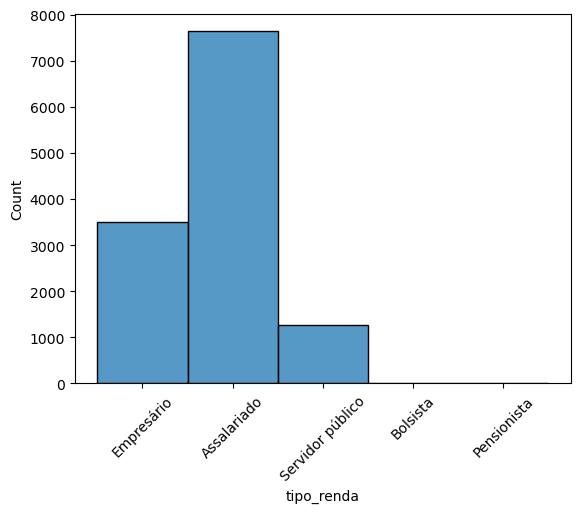

In [89]:
# Variável 'tipo_renda'
sns.histplot(x='tipo_renda', data=previsao)
plt.xticks(rotation=45)

In [90]:
# Matriz com as categorias da variável 'tipo_renda'
patsy.dmatrix("C(tipo_renda, Treatment(0))", data=previsao)

DesignMatrix with shape (12427, 5)
  Columns:
    ['Intercept',
     'C(tipo_renda, Treatment(0))[T.Bolsista]',
     'C(tipo_renda, Treatment(0))[T.Empresário]',
     'C(tipo_renda, Treatment(0))[T.Pensionista]',
     'C(tipo_renda, Treatment(0))[T.Servidor público]']
  Terms:
    'Intercept' (column 0)
    'C(tipo_renda, Treatment(0))' (columns 1:5)
  (to view full data, use np.asarray(this_obj))

Pelo histograma, vemos que a categoria do 'tipo_renda' mais frequente é a 'Assalariado', que é o item 0 da forma matricial da variável categorizada.

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

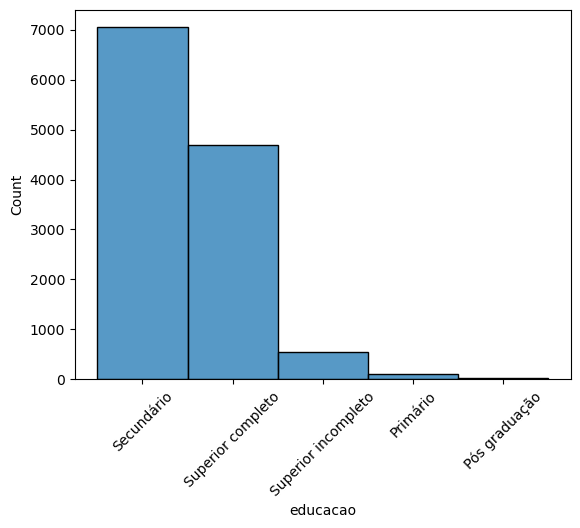

In [91]:
# Variável 'educacao'
sns.histplot(x='educacao', data=previsao)
plt.xticks(rotation=45)

In [92]:
# Matriz com as categorias da variável 'educacao'
patsy.dmatrix("C(educacao, Treatment(2))", data=previsao)

DesignMatrix with shape (12427, 5)
  Columns:
    ['Intercept',
     'C(educacao, Treatment(2))[T.Primário]',
     'C(educacao, Treatment(2))[T.Pós graduação]',
     'C(educacao, Treatment(2))[T.Superior completo]',
     'C(educacao, Treatment(2))[T.Superior incompleto]']
  Terms:
    'Intercept' (column 0), 'C(educacao, Treatment(2))' (columns 1:5)
  (to view full data, use np.asarray(this_obj))

A categoria da variável 'educacao' mais frequente é a 'Secundário', que é o item 2 da forma matricial da variável categorizada.

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

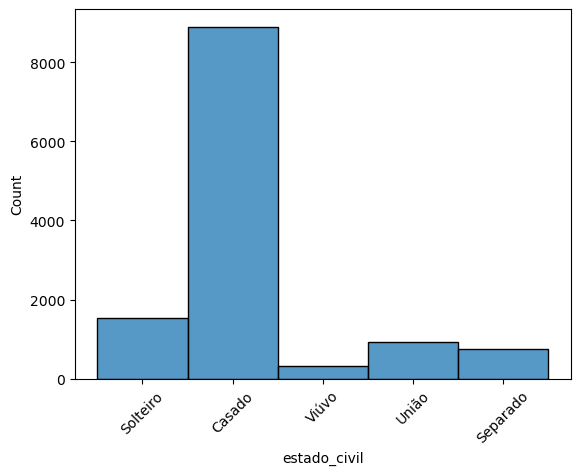

In [93]:
# Variável 'estado_civil'
sns.histplot(x='estado_civil', data=previsao)
plt.xticks(rotation=45)

In [94]:
# Matriz com as categorias da variável 'estado_civil'
patsy.dmatrix("C(estado_civil, Treatment(0))", data=previsao)

DesignMatrix with shape (12427, 5)
  Columns:
    ['Intercept',
     'C(estado_civil, Treatment(0))[T.Separado]',
     'C(estado_civil, Treatment(0))[T.Solteiro]',
     'C(estado_civil, Treatment(0))[T.União]',
     'C(estado_civil, Treatment(0))[T.Viúvo]']
  Terms:
    'Intercept' (column 0)
    'C(estado_civil, Treatment(0))' (columns 1:5)
  (to view full data, use np.asarray(this_obj))

A categoria da variável 'estado_civil' mais frequente é a 'Casado', que é o item 0 da forma matricial da variável categorizada.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

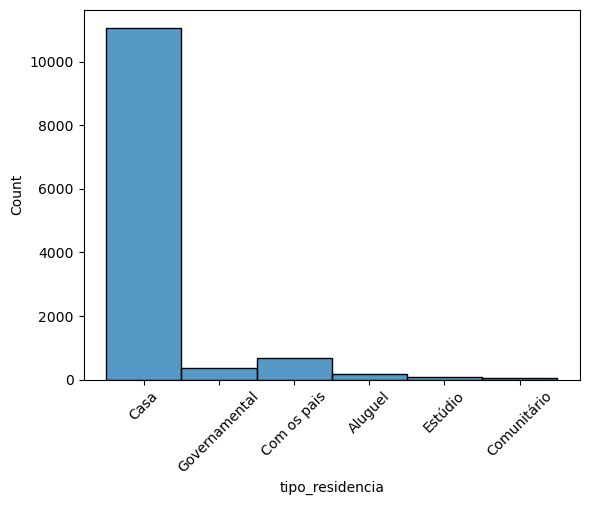

In [95]:
# Variável 'tipo_residencia'
sns.histplot(x='tipo_residencia', data=previsao)
plt.xticks(rotation=45)

In [96]:
# Matriz com as categorias da variável 'tipo_residencia'
patsy.dmatrix("C(tipo_residencia, Treatment(1))", data=previsao)

DesignMatrix with shape (12427, 6)
  Columns:
    ['Intercept',
     'C(tipo_residencia, Treatment(1))[T.Aluguel]',
     'C(tipo_residencia, Treatment(1))[T.Com os pais]',
     'C(tipo_residencia, Treatment(1))[T.Comunitário]',
     'C(tipo_residencia, Treatment(1))[T.Estúdio]',
     'C(tipo_residencia, Treatment(1))[T.Governamental]']
  Terms:
    'Intercept' (column 0)
    'C(tipo_residencia, Treatment(1))' (columns 1:6)
  (to view full data, use np.asarray(this_obj))

A categoria da variável 'tipo_residencia' mais frequente é a 'Casa', sendo esta o item 1 da matriz da variável categorizada.

Tendo visualizado as categorias mais frequentes, vamos colocá-las como caselas de referência no ajuste da variável 'renda'.

In [97]:
# Variação nas matrizes resposta e explicativa inserindo as caselas de referência
y, X = patsy.dmatrices('''np.log(renda) ~ C(sexo) +  
                       C(posse_de_veiculo) + C(posse_de_imovel) + 
                       C(tipo_renda, Treatment(0)) + 
                       C(educacao, Treatment(2)) + 
                       C(estado_civil, Treatment(0)) +
                       C(tipo_residencia, Treatment(1)) +
                       qtd_filhos + idade + tempo_emprego + 
                       qt_pessoas_residencia''', data = previsao)

In [98]:
# Ajuste das matrizes 
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:42:47   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5264      0.219     29.853      0.000       6.098       6.955
C(sexo)[T.M]                                          0.7874      0.015     53.723      0.000       0.759       0.816
C(posse_de_veiculo)[T.True]                           0.0441      0.014      3.119      0.002       0.016       0.072
C(posse_de_imovel)[T.True]                            0.0829      0.014      5.926      0.000       0.055       0.110
C(tipo_renda, Treatment(0))[T.Bolsista]               0.2209      0.241      0.916      0.360      -0.252       0.694
C(tipo_renda, Treatment(0))[T.Empresário]             0.1551      0.015     10.387      0.000       0.126       0.184
C(tipo_renda, Treatment(0))[T.Pensionista]           -0.3087      0.241     -1.280      0.201      -0.782       0.164
C(tipo_renda, Treatment(0))[T.Servidor público]       0.0576      0.022      2.591      0.010       0.014       0.101
C(educacao, Treatment(2))[T.Primário]                 0.0141      0.072      0.196      0.844      -0.127       0.155
C(educacao, Treatment(2))[T.Pós graduação]            0.1212      0.142      0.853      0.394      -0.157       0.400
C(educacao, Treatment(2))[T.Superior completo]        0.1079      0.014      7.763      0.000       0.081       0.135
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0290      0.032     -0.900      0.368      -0.092       0.034
C(estado_civil, Treatment(0))[T.Separado]             0.3265      0.111      2.935      0.003       0.108       0.545
C(estado_civil, Treatment(0))[T.Solteiro]             0.2672      0.109      2.453      0.014       0.054       0.481
C(estado_civil, Treatment(0))[T.União]               -0.0343      0.025     -1.361      0.174      -0.084       0.015
C(estado_civil, Treatment(0))[T.Viúvo]                0.3689      0.116      3.191      0.001       0.142       0.596
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0442      0.054      0.815      0.415      -0.062       0.150
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0184      0.029      0.625      0.532      -0.039       0.076
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.0754      0.091     -0.829      0.407      -0.254       0.103
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.1107      0.084      1.319      0.187      -0.054       0.275
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0129      0.039     -0.331      0.741      -0.089       0.064
qtd_filhos                                           -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                                 0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego  

Em relação ao sentido prático das variáveis, a única que não aparenta ter, em um sentido ético, é a 'sexo', uma vez que tentar prever a renda de uma pessoa a partir de seu sexo leva a ideias discriminatórias. Logo, vamos removê-la da análise.

In [99]:
# Remoção da variável 'sexo' da matriz explicativa
y, X = patsy.dmatrices('''np.log(renda) ~  C(posse_de_veiculo) +
                        C(posse_de_imovel) + 
                       C(tipo_renda, Treatment(0)) + 
                       C(educacao, Treatment(2)) + 
                       C(estado_civil, Treatment(0)) +
                       C(tipo_residencia, Treatment(1)) +
                       qtd_filhos + idade + tempo_emprego + 
                       qt_pessoas_residencia''', data = previsao)

In [100]:
# Ajuste sem a variável 'sexo'
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     141.6
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:42:48   Log-Likelihood:                -14868.
No. Observations:               12427   AIC:                         2.978e+04
Df Residuals:                   12403   BIC:                         2.996e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.0122      0.243     28.915      0.000       6.537       7.488
C(posse_de_veiculo)[T.True]                           0.2815      0.015     18.875      0.000       0.252       0.311
C(posse_de_imovel)[T.True]                            0.0572      0.016      3.688      0.000       0.027       0.088
C(tipo_renda, Treatment(0))[T.Bolsista]               0.0855      0.268      0.319      0.750      -0.439       0.610
C(tipo_renda, Treatment(0))[T.Empresário]             0.1130      0.017      6.821      0.000       0.080       0.145
C(tipo_renda, Treatment(0))[T.Pensionista]           -0.2609      0.268     -0.974      0.330      -0.786       0.264
C(tipo_renda, Treatment(0))[T.Servidor público]       0.0108      0.025      0.437      0.662      -0.038       0.059
C(educacao, Treatment(2))[T.Primário]                 0.0910      0.080      1.138      0.255      -0.066       0.248
C(educacao, Treatment(2))[T.Pós graduação]           -0.0367      0.158     -0.233      0.816      -0.346       0.273
C(educacao, Treatment(2))[T.Superior completo]        0.0633      0.015      4.108      0.000       0.033       0.094
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0329      0.036     -0.919      0.358      -0.103       0.037
C(estado_civil, Treatment(0))[T.Separado]             0.1951      0.123      1.580      0.114      -0.047       0.437
C(estado_civil, Treatment(0))[T.Solteiro]             0.1875      0.121      1.551      0.121      -0.050       0.425
C(estado_civil, Treatment(0))[T.União]               -0.0906      0.028     -3.245      0.001      -0.145      -0.036
C(estado_civil, Treatment(0))[T.Viúvo]                0.1049      0.128      0.818      0.413      -0.146       0.356
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.1896      0.060      3.157      0.002       0.072       0.307
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0518      0.033      1.584      0.113      -0.012       0.116
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.1278      0.101     -1.265      0.206      -0.326       0.070
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.3166      0.093      3.402      0.001       0.134       0.499
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0479      0.043     -1.106      0.269      -0.133       0.037
qtd_filhos                                           -0.2082      0.120     -1.737      0.082      -0.443       0.027
idade                                                 0.0027      0.001      3.023      0.003       0.001       0.004
tempo_emprego                                         0.0571      0.001     49.683      0.000       0.055       0.059
qt_pessoas_resi

Verifica-se que o R² do ajuste caiu drasticamente. Apesar disso, vamos seguir com a análise.

2. Remoção da variável menos significativa e análise do resultado.

Observando todos os p-values do ajuste, considerando que quando o valor é superior a 5%, a variável não é significativa para o ajuste, a menos significativa em questão é a 'educacao', uma que quase todos as categorias desta variável tem p-value superior a 10% (com excessão da categoria 'Superior Completo' que deve ter um valor médio muito próximo ao da categoria 'Secundário', definida como casela de referência). Vamos removê-la do ajuste.  

In [101]:
# Remoção da variável 'educacao' da matriz explicativa
y, X = patsy.dmatrices('''np.log(renda) ~  C(posse_de_veiculo) +
                        C(posse_de_imovel) + 
                       C(tipo_renda, Treatment(0)) + 
                       C(estado_civil, Treatment(0)) +
                       C(tipo_residencia, Treatment(1)) +
                       qtd_filhos + idade + tempo_emprego + 
                       qt_pessoas_residencia''', data = previsao)

In [102]:
# Ajuste sem a variável 'educacao'
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     170.1
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:42:48   Log-Likelihood:                -14878.
No. Observations:               12427   AIC:                         2.980e+04
Df Residuals:                   12407   BIC:                         2.994e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.0464      0.242     29.073      0.000       6.571       7.521
C(posse_de_veiculo)[T.True]                           0.2854      0.015     19.168      0.000       0.256       0.315
C(posse_de_imovel)[T.True]                            0.0590      0.016      3.804      0.000       0.029       0.089
C(tipo_renda, Treatment(0))[T.Bolsista]               0.1319      0.268      0.493      0.622      -0.393       0.657
C(tipo_renda, Treatment(0))[T.Empresário]             0.1183      0.016      7.172      0.000       0.086       0.151
C(tipo_renda, Treatment(0))[T.Pensionista]           -0.2262      0.268     -0.844      0.398      -0.751       0.299
C(tipo_renda, Treatment(0))[T.Servidor público]       0.0213      0.025      0.870      0.384      -0.027       0.069
C(estado_civil, Treatment(0))[T.Separado]             0.1949      0.124      1.577      0.115      -0.047       0.437
C(estado_civil, Treatment(0))[T.Solteiro]             0.1835      0.121      1.517      0.129      -0.054       0.421
C(estado_civil, Treatment(0))[T.União]               -0.0917      0.028     -3.281      0.001      -0.146      -0.037
C(estado_civil, Treatment(0))[T.Viúvo]                0.1032      0.128      0.805      0.421      -0.148       0.355
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.1845      0.060      3.072      0.002       0.067       0.302
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0519      0.033      1.590      0.112      -0.012       0.116
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.1002      0.101     -0.995      0.320      -0.298       0.097
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.3228      0.093      3.466      0.001       0.140       0.505
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0510      0.043     -1.175      0.240      -0.136       0.034
qtd_filhos                                           -0.2033      0.120     -1.696      0.090      -0.438       0.032
idade                                                 0.0025      0.001      2.823      0.005       0.001       0.004
tempo_emprego                                         0.0572      0.001     49.728      0.000       0.055       0.059
qt_pessoas_residencia                                 0.2395      0.120      2.001      0.045       0.005       0.474
==============================================================================
Omnibus:                       24.965   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.051
Skew:                           0.109   Prob(JB):                     3.63e-06
Kurtosis:                       3.024   Cond. No.    

O R² diminuiu levemente, tendo ido de 0.208 para 0.207, além disso, também houve uma leve queda no R²-ajustado, indo de 0.206 para 0.205, e uma pequeníssima aumentada no AIC, variando de 2.978e+04 para 2.980e+04. Considerando que tais alterações são apenas na última casa decimal, as alterações podem ser desprezadas, confirmando que a variável em questão não era significativa no modelo. Lembrando que quando inserimos alguma variável no modelo, o R² tende a aumentar ou, no pior do caso, não alterar, além de que a utilização de variáveis não significativas aumenta a chance de um 'overfitting'.

Comparando os valores dos coeficientes e p-values de cada variável, só foram notadas diferenças em duas categorias do 'tipo_renda', sendo elas 'Bolsista', p-value foi de 0.750 para 0.622 e coeficiente variou de 0.0855 para 0.1319, e 'Sevidor Público', tendo o p-value indo de 0.662 para 0.384 e o coeficiente de 0.0108 para 0.0213. Com exceção destes dois casos, todas as outras variáveis não apresentaram mudanças nos valores, ou apresentaram, mas muito pequenos (apenas na terceira casa decimal).   

3. Remoção das variáveis menos significantes, sempre que o p-value for maior que 5%. Comparação entre o modelo final com o inicial. Observação dos indicadores e conclusão se o modelo parece melhor.

A variável menos significante da vez é o 'tipo_renda', cujos p-values estão entre 0.3 e 0.7 (novamente, a categoria cujo p-value é 0 deve apresentar um valor médio muito próximo à casela de referência da variável, não em relação a todo o ajuste). Removendo a variável:

In [103]:
# Remoção da variável 'tipo_renda' da matriz explicativa
y, X = patsy.dmatrices('''np.log(renda) ~  C(posse_de_veiculo) +
                        C(posse_de_imovel) +  
                       C(estado_civil, Treatment(0)) +
                       C(tipo_residencia, Treatment(1)) +
                       qtd_filhos + idade + tempo_emprego + 
                       qt_pessoas_residencia''', data = previsao)

In [104]:
# Ajuste sem a variável 'tipo_renda'
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     211.1
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:42:49   Log-Likelihood:                -14904.
No. Observations:               12427   AIC:                         2.984e+04
Df Residuals:                   12411   BIC:                         2.996e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.1196      0.243     29.344      0.000       6.644       7.595
C(posse_de_veiculo)[T.True]                           0.2858      0.015     19.160      0.000       0.257       0.315
C(posse_de_imovel)[T.True]                            0.0603      0.016      3.881      0.000       0.030       0.091
C(estado_civil, Treatment(0))[T.Separado]             0.1861      0.124      1.504      0.133      -0.057       0.429
C(estado_civil, Treatment(0))[T.Solteiro]             0.1769      0.121      1.459      0.145      -0.061       0.414
C(estado_civil, Treatment(0))[T.União]               -0.0849      0.028     -3.036      0.002      -0.140      -0.030
C(estado_civil, Treatment(0))[T.Viúvo]                0.0839      0.129      0.653      0.514      -0.168       0.336
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.1827      0.060      3.037      0.002       0.065       0.301
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0421      0.033      1.286      0.198      -0.022       0.106
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.1160      0.101     -1.150      0.250      -0.314       0.082
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.3378      0.093      3.624      0.000       0.155       0.520
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0501      0.043     -1.154      0.249      -0.135       0.035
qtd_filhos                                           -0.1949      0.120     -1.622      0.105      -0.430       0.041
idade                                                 0.0023      0.001      2.595      0.009       0.001       0.004
tempo_emprego                                         0.0565      0.001     49.622      0.000       0.054       0.059
qt_pessoas_residencia                                 0.2274      0.120      1.896      0.058      -0.008       0.463
==============================================================================
Omnibus:                       24.718   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.801
Skew:                           0.109   Prob(JB):                     4.12e-06
Kurtosis:                       3.025   Cond. No.                     2.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Novamente, foram observadas variações muito pequenas nos indicadores R², R-ajustado e AIC, de forma que o ajuste é, praticamente, o mesmo. 

Vamos remover agora a variável 'estado_civil', cujos p-values estão entre 0.1 e 0.6.

In [105]:
# Remoção da variável 'estado_civil' da matriz explicativa
y, X = patsy.dmatrices('''np.log(renda) ~  C(posse_de_veiculo) +
                        C(posse_de_imovel) +  
                       C(tipo_residencia, Treatment(1)) +
                       qtd_filhos + idade + tempo_emprego + 
                       qt_pessoas_residencia''', data = previsao)

In [106]:
# Ajuste sem a variável 'estado_civil'
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     286.1
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:42:49   Log-Likelihood:                -14912.
No. Observations:               12427   AIC:                         2.985e+04
Df Residuals:                   12415   BIC:                         2.994e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.4583      0.049    152.929      0.000       7.363       7.554
C(posse_de_veiculo)[T.True]                           0.2892      0.015     19.467      0.000       0.260       0.318
C(posse_de_imovel)[T.True]                            0.0608      0.016      3.919      0.000       0.030       0.091
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.1837      0.060      3.053      0.002       0.066       0.302
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0424      0.033      1.297      0.195      -0.022       0.107
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.1150      0.101     -1.140      0.254      -0.313       0.083
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.3378      0.093      3.623      0.000       0.155       0.521
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0461      0.043     -1.060      0.289      -0.131       0.039
qtd_filhos                                           -0.0206      0.021     -0.957      0.338      -0.063       0.022
idade                                                 0.0022      0.001      2.608      0.009       0.001       0.004
tempo_emprego                                         0.0565      0.001     49.660      0.000       0.054       0.059
qt_pessoas_residencia                                 0.0537      0.018      2.989      0.003       0.018       0.089
==============================================================================
Omnibus:                       26.368   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.469
Skew:                           0.112   Prob(JB):                     1.79e-06
Kurtosis:                       3.025   Cond. No.                         596.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Não foi notada variação no R²-ajustado, enquanto que o R² teve uma leve diminuição e o AIC, um pequeno aumento, sendo ambos desprezíveis.  

A variável menos significativa agora é a 'qtd_filhos', tendo p-value de 0.338.

In [107]:
# Remoção da variável 'qtd_filhos' da matriz explicativa
y, X = patsy.dmatrices('''np.log(renda) ~  C(posse_de_veiculo) +
                        C(posse_de_imovel) +  
                       C(tipo_residencia, Treatment(1)) +
                       idade + tempo_emprego + 
                       qt_pessoas_residencia''', data = previsao)

In [108]:
# Ajuste sem a variável 'qtd_filhos'
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     314.6
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:42:50   Log-Likelihood:                -14913.
No. Observations:               12427   AIC:                         2.985e+04
Df Residuals:                   12416   BIC:                         2.993e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.4790      0.044    171.071      0.000       7.393       7.565
C(posse_de_veiculo)[T.True]                           0.2904      0.015     19.628      0.000       0.261       0.319
C(posse_de_imovel)[T.True]                            0.0605      0.016      3.897      0.000       0.030       0.091
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.1826      0.060      3.035      0.002       0.065       0.300
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0419      0.033      1.281      0.200      -0.022       0.106
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.1151      0.101     -1.141      0.254      -0.313       0.083
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.3373      0.093      3.618      0.000       0.155       0.520
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0455      0.043     -1.047      0.295      -0.131       0.040
idade                                                 0.0023      0.001      2.751      0.006       0.001       0.004
tempo_emprego                                         0.0565      0.001     49.653      0.000       0.054       0.059
qt_pessoas_residencia                                 0.0383      0.008      4.794      0.000       0.023       0.054
==============================================================================
Omnibus:                       26.669   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.773
Skew:                           0.113   Prob(JB):                     1.54e-06
Kurtosis:                       3.025   Cond. No.                         596.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Os indicadores continuaram os mesmos com a remoção da variável.

A única variável agora com p-value muito alto para o ajuste é a 'tipo_residencia'. Vejamos o ajuste final sem ela.

In [109]:
# Remoção da variável 'tipo_residencia' da matriz explicativa
y, X = patsy.dmatrices('''np.log(renda) ~  C(posse_de_veiculo) +
                        C(posse_de_imovel) +  
                       idade + tempo_emprego + 
                       qt_pessoas_residencia''', data = previsao)

In [110]:
# Ajuste sem a variável 'tipo_residencia'
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     623.0
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:42:50   Log-Likelihood:                -14926.
No. Observations:               12427   AIC:                         2.986e+04
Df Residuals:                   12421   BIC:                         2.991e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.4992      0.043    175.953      0.000       7.416       7.583
C(posse_de_veiculo)[T.True]     0.2925      0.015     19.768      0.000       0.263       0.321
C(posse_de_imovel)[T.True]      0.0579      0.015      3.796      0.000       0.028       0.088
idade                           0.0021      0.001      2.433      0.015       0.000       0.004
tempo_emprego                   0.0565      0.001     49.646      0.000       0.054       0.059
qt_pessoas_residencia           0.0374      0.008      4.687      0.000       0.022       0.053
==============================================================================
Omnibus:                       26.294   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.400
Skew:                           0.112   Prob(JB):                     1.85e-06
Kurtosis:                       3.020   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Novamente, as variações nos indicadores foram apenas na terceira casa decimal, podendo ser consideradas desprezíveis. Além disso, não há mais variáveis com p-values maiores do que 5%.

Comparando este último ajuste com o primeiro (sem a variável 'sexo'), verifica-se que os indicadores apresentam quase os mesmos valores (R² foi de 0.208 para 0.200, R²-ajustado estava em 0.206 e terminou em 0.200, e o AIC que aumentou de 2.978e+04 para 2.986e+04). Ou seja, apesar das variações, não houveram mudanças significativas no modelo. Uma vez que este último apresenta menos variáveis do que o primeiro, ele pode ser considerado o mais simples. De acordo com a Navalha de Occam, na qual se temos dois modelos com indicadores iguais de qualidade e um é mais simples, o mais simples é desejável, o último modelo pode ser considerado o melhor entre os dois.  